# Lab CNN: Image Recognition 
## with Convolutional Neural Networks

## Necessity
ANN have disadvantages:
- require linear input - too big for average size images
- each hidden neuron is connected with every one from the previous layer - too many weights and complicated calculations

CNN idea based on human vision: one neuron in the visual cortex has a small local receptive field and a preference of shapes/stimuli to react. All neurons together build the whole visual field.

## Convolutional Neural Network

The full picture:
!["Explanation of image"](../images/cnnimages/fullcnn.png "CNN")

## Features

### Input Layer
2- or 3-dimensional - more natural representation of the image

!["Explanation of image"](../images/cnnimages/8-gif.gif "pixels")

### Convolutional Layer
Connects one hidden neuron with a small part of the previous layer neurons. <br>
A the small receptive field, called __convolution kernel__ is used as a _weight_ and a _filter_

!["Explanation of image"](../images/cnnimages/convolutional.png "pixels")

#### Feature Maps
Each convolutional layer extracts specific features: feature maps. Each pixel of each feature map is an output of the convolutional layer.
Here are some examples.

!["Explanation of image"](../images/cnnimages/filters.png "pixels")

The filter on the left might activate strongest when it encounters a horizontal line; the one in the middle for a vertical line.

In the convolution layer, the filters slide across the input, row by row, and act when they detect their shape.<br>
Sliding filters are how the CNN can learn meaningful features and later locate them in any part of the image.

!["Explanation of image"](../images/cnnimages/kernels.gif "pixels")

#### Kernels

This is an illustration of a kernel:
!["Explanation of image"](../images/cnnimages/kernel.gif "pixels")

__Strides__: the number of transitional positions - 1 on the image above <br>
__Padding__: adding pixels to the sides, needed for processing the edge pixels - 1 on the image below <br>


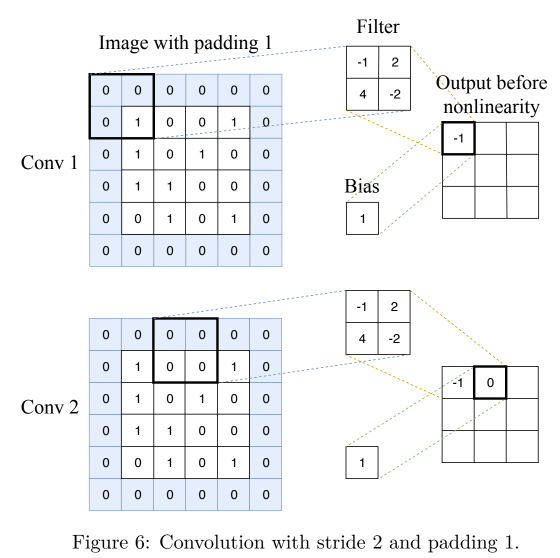

### Pooling Layer
Used as _activation function_ and for reducing the size of the layer

This is an illustration of a max pooling: four pixels are replaced by the one, which has the biggest value.
!["Explanation of image"](../images/cnnimages/pooling.gif "Pooling")

### Fully Connected Layers and Dropouts

To avoid overfitting, various models of networks can be used, but it is expensive. Alternatively, a single model can be used to simulate large number of different networks by _randomly dropping out nodes_ during training. This is called __dropout__ and used as effective regularization method for reducing the overfitting and improve the errors. It can be implemented at the __fully connected__ layers.
More about dropouts: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

### Output Layer
A classic, fully connected layer is used as __output layer__.

## CNN Task: Cat or Dog?

!["Explanation of data"](../images/cnnimages/catordog.gif "CatorDog")

## Solution

In [ ]:
!pip install opencv-python
# for resizing images

In [ ]:
!pip install tflearn
# for CNN modelling

In [ ]:
!pip install livelossplot
# for graphics

In [3]:
from __future__ import division, print_function, absolute_import

### Imports

In [4]:
# Imports
import cv2                 # working with and resizing images
import os                  # dealing with directories
import numpy as np         # dealing with arrays and numbers
from random import shuffle # mixing up or currently ordered data
from tqdm import tqdm      # extra UX, shows progress bar

In [5]:
import os
os.getcwd()

'/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18'

### Data

In [6]:
# https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
# https://www.cs.toronto.edu/~kriz/cifar.html
# TRAIN_DIR = '../data/cnn/train'
# TEST_DIR = '../data/cnn/test'
TRAIN_DIR = '/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/data/train'
TEST_DIR = '/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/data/test'
IMG_SIZE = 50
LR = 1e-4

In [7]:
# training files
list = os.listdir(TRAIN_DIR)

In [8]:
# number of training files
n_files = len(list)
n_files

25000

In [9]:
# see some
list[3666]

'cat.3951.jpg'

#### Set Labels

In [10]:
# function to get the image file name and create a label for it - one hot encoder
def set_label(file_name):
    label = file_name.split('.')[-3] 
    if label == 'cat': return [1,0]
    elif label == 'dog': return [0,1]

In [11]:
# prepare train data
def create_train_data(list):
    # empty array, which will contain the train images and their labels
    train_data = []
    
    # for each image file in the train directory:
    for file_name in tqdm(list):
        # convert the file name into label by use of the function above
        label = set_label(file_name)
        
        # extend the file path for this image with the file name
        file_path = os.path.join(TRAIN_DIR, file_name)
        
        # read the image from this file
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        # img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        
        # resize the image, so all have same size
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))       
        
        # add the image and its label into array 
        # train_data.append([np.array(img), np.array(label)])
        train_data.append([img, label])
        
    shuffle(train_data)
    np.save('/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/models/train_data.npy', train_data)
    return train_data   

In [12]:
train_data = create_train_data(list)

100%|██████████| 25000/25000 [05:30<00:00, 75.72it/s]


In [13]:
train_data

[[array([[118, 135, 135, ..., 152, 146, 137],
         [130, 128, 145, ..., 150, 175, 133],
         [141, 115, 142, ..., 176, 147, 145],
         ...,
         [ 88, 111, 139, ..., 174, 195, 181],
         [ 74, 100, 147, ..., 151, 185, 174],
         [131,  96, 104, ..., 144, 165, 181]], dtype=uint8),
  [0, 1]],
 [array([[167, 161, 166, ..., 166, 165, 165],
         [162, 169, 168, ..., 163, 165, 167],
         [163, 149, 119, ..., 183, 175, 166],
         ...,
         [156, 138,  91, ..., 113, 147, 163],
         [162, 173, 153, ..., 154, 167, 163],
         [166, 166, 166, ..., 167, 166, 166]], dtype=uint8),
  [0, 1]],
 [array([[198, 200, 201, ..., 195, 196, 196],
         [201, 201, 200, ..., 195, 201, 195],
         [201, 202, 200, ..., 195, 195, 199],
         ...,
         [230, 230, 229, ..., 232, 231, 232],
         [231, 236, 235, ..., 234, 233, 232],
         [233, 231, 236, ..., 233, 232, 230]], dtype=uint8),
  [1, 0]],
 [array([[109, 130, 130, ..., 250, 250, 208],
      

#### Prepare X and Y sets From Train Data

In [14]:
# split the training data into train and test, for testing while training
train = train_data[:-500]
train_test = train_data[-500:]

In [15]:
# split both into X and Y
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)
Y = np.array([i[1] for i in train])
print(Y.shape)

(24500, 50, 50, 1)
(24500, 2)


In [16]:
# split both into X and Y
X_test_set = np.array([i[0] for i in train_test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y_test_set = np.array([i[1] for i in train_test])
print(X_test_set.shape)
print(Y_test_set.shape)

(500, 50, 50, 1)
(500, 2)


#### Build the CNN

In [17]:
!pip install tensorflow==1.15

  ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.2.0rc3)
ERROR: No matching distribution found for tensorflow==1.15
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
# Import
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.metrics import Accuracy

In [19]:
# Prepare image transformations
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# normalisation
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [20]:
# Buld the CNN
# Input: IMG_SIZE x IMG_SIZE x 3 color channels (red, green and blue)
network = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input',
          # data_preprocessing=img_prep, 
          data_augmentation=img_aug)

# 1: Convolution layer with 32 filters, each 3x3x3
network = conv_2d(network, 32, 5, activation='relu')
# 2: Max pooling layer
network = max_pool_2d(network, 2)
                    
# 3: Convolution layer with 64 filters
network = conv_2d(network, 64, 5, activation='relu')
# 4: Max pooling layer
network = max_pool_2d(network, 2)

# 5: Convolution layer with 128 filters
network = conv_2d(network, 128, 5, activation='relu')
# 6: Max pooling layer
network = max_pool_2d(network, 2)

# 7: Convolution layer with 64 filters
network = conv_2d(network, 64, 5, activation='relu')
# 8: Max pooling layer
network = max_pool_2d(network, 2)
                     
# 9: Convolution layer with 32 filters
network = conv_2d(network, 32, 5, activation='relu')
# 10: Max pooling layer
network = max_pool_2d(network, 2)

# 11: Fully-connected 512 node layer
network = fully_connected(network, 1024, activation='relu')

# 12: Dropout layer to combat overfitting
network = dropout(network, 0.8)

# Output: Fully-connected layer with two outputs
network = fully_connected(network, 2, activation='softmax')




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Configure how the network will be trained
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam', learning_rate=LR, 
                     loss='categorical_crossentropy', metric=acc, name='target')


Instructions for updating:
keep_dims is deprecated, use keepdims instead





In [22]:
# Wrap the network in a model object
import tflearn
model = tflearn.DNN(network, checkpoint_path='tmp/log',
                    tensorboard_verbose = 0, max_checkpoints = 1,
                    tensorboard_dir='tmp/log')
# parameters for the log files



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







#### Train the CNN

In [23]:
# Train model for 5 epochs
model.fit({'input': X}, {'target': Y}, n_epoch=5, 
          validation_set=({'input': X_test_set}, {'target': Y_test_set}), 
          snapshot_step=500, show_metric=True, run_id='MyModel12CNN')

# see http://tflearn.org/models/dnn/ for more

Training Step: 1914  | total loss: 0.51574 | time: 355.811s
| Adam | epoch: 005 | loss: 0.51574 - Accuracy: 0.7484 -- iter: 24448/24500
Training Step: 1915  | total loss: 0.51533 | time: 357.947s
| Adam | epoch: 005 | loss: 0.51533 - Accuracy: 0.7517 | val_loss: 0.43937 - val_acc: 0.8080 -- iter: 24500/24500
--


In [24]:
# save the model
model.save('/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/models/MyModel12CNN.tflearn')

In [25]:
# See Tensorboard at tensorboard --logdir='/tmp/tflearn_logs'
# Tensorboard default address: http://0.0.0.0/6006
!tensorboard --logdir='tmp/tflearn_logs/'

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### Test the Model with Unlabeled Data

In [26]:
# load the model
model.load('/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/models/MyModel12CNN.tflearn')

INFO:tensorflow:Restoring parameters from /Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/models/MyModel12CNN.tflearn


In [27]:
# number of test files
list = os.listdir(TEST_DIR)
n_files = len(list)
n_files

12500

In [28]:
# prepare test data - files have no word labels
def process_test_data(list):
    test_data = []
    for file in tqdm(list):
        # create file path
        path = os.path.join(TEST_DIR, file)
        # get image from this file
        img_num = file.split('.')[0]
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        # img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        img_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE))
        test_data.append([np.array(img_data), img_num])        
    shuffle(test_data)
    np.save('/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week18/models/test_data.npy', test_data)
    return test_data

In [29]:
test_data = process_test_data(list)

100%|██████████| 12500/12500 [01:42<00:00, 121.68it/s]


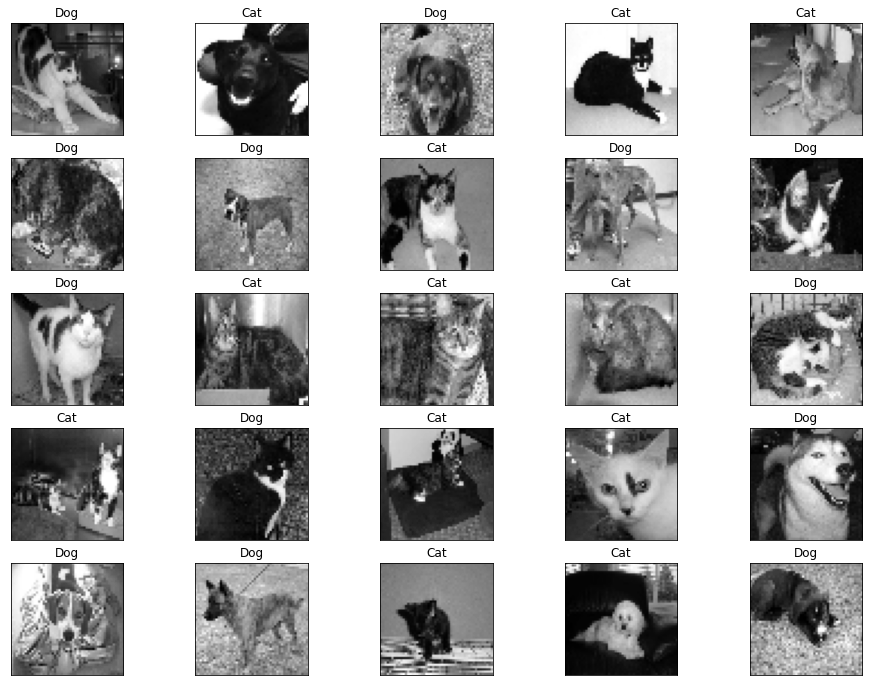

In [30]:
# Test and plot
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[1000:1025]):
    # cat: [1,0]
    # dog: [0,1]
    
    image = data[0]
    id = data[1]   
    
    original = image
    data = image.reshape(IMG_SIZE,IMG_SIZE,1)   
    
    # predict
    predicted = model.predict([data])[0]
    #print(f"cat: {predicted[0]}, dog: {predicted[1]}")
    
    if np.argmax(predicted) == 1: 
        result='Dog'
    else: 
        result='Cat'
            
    y = fig.add_subplot(5, 5, num+1)
    y.imshow(original, cmap='gray')
    # y.imshow(original)
    
    plt.title(result)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


### Test with Unseen Image

In [ ]:
# load your test image
img = cv2.imread('../images/cnnimages/siam.jpg')
print('Original Dimensions : ', img.shape)

In [ ]:
# resize
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
print('Resized Dimensions : ', img.shape)

In [31]:
# predict
predicted = model.predict([data])[0]
print(f"cat: {predicted[0]}, dog: {predicted[1]}")
if np.argmax(predicted) == 1: 
    result='Dog'
else: 
    result='Cat'
print(result)

cat: 0.04477967694401741, dog: 0.9552202820777893
Dog


In [32]:
cv2.imshow('result', img)
cv2.imwrite('result.jpg',img)
cv2.waitKey(0)       

NameError: name 'img' is not defined

#### How to Get Better Result
There's a lot of effort required, such as:

- Bigger networks with more layers: ResNet - the winner of the 2015 ImageNet Large Scale Visual Recognition Challenge (ILSVRC) - has 152 layers. (And if that wasn’t enough, to win they competition they used an ensemble of ResNets). 
- Pre-training: the winner of the Kaggle Dogs vs. Cats competition wrote, "My system was pre-trained on ImageNet (ILSVRC12 classification dataset) and subsequently refined on the cats and dogs data". The ImageNet ILSVRC12 dataset contains 10m labelled images depicting 10k objects. Even if there aren't many cats and dogs in the pre-training data, it helps the CNN learn useful filters for distinguishing objects in images. This is sometimes called "transfer learning." 
- Larger, higher-resolution images, downsizing sacrifices information; larger images have more detail and afford larger filters.
- Bagging, ensembles and using CNNs as inputs to other ML techniques: the 8th placed contestant in Kaggle's competition described some of their approaches on their blog.

__From__: http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks


## Your Task

1. Locate the data source here: https://www.tensorflow.org/tutorials/images/cnn
   Study the code. What does it do? What does it consist of?

   Explain the model, defined in it.
   For each layer, write down: the input, what the layers actually does and the output shape.

   Build and train the model. 
   What are the achieved values for precission and loss?

2. Now go to https://github.com/keras-team/keras/blob/master/examples/imdb_cnn_lstm.py
   Are there similarities and differences between the two models?

## Reference <br>
- https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8 
- http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf
- http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/